# Problem Set 3 (Deep Learning & Unsupervised Learning) Solution

## Ling Min Hao 

### 1. A Simple Neural Network

(a) The neural network is formulated as follows (for one example): 

For the hidden layer, we have
\begin{align*}
z_1^{[1]} = \begin{bmatrix} w_{1,1}^{[1]} & w_{2,1}^{[1]} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + w_{0,1}^{[1]} \\ 
h_1 = g(z_1^{[1]})
\end{align*}

\begin{align*}
z_2^{[1]} = \begin{bmatrix} w_{1,2}^{[1]} & w_{2,2}^{[1]} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + w_{0,2}^{[1]} \\ 
h_2 = g(z_2^{[1]})
\end{align*}

\begin{align*}
z_3^{[1]} = \begin{bmatrix} w_{1,3}^{[1]} & w_{2,3}^{[1]} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + w_{0,3}^{[1]} \\ 
h_3 = g(z_3^{[1]})
\end{align*}

For the output layer, we have 
\begin{align*}
z_1^{[2]} = \begin{bmatrix} w_1^{[2]} & w_2^{[2]} & w_3^{[2]} \end{bmatrix}\begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} + w_0^{[2]} \\ 
o = g(z_1^{[2]})
\end{align*}

We first solve the problem using one training example, i.e when 
\begin{align*}
l = (o-y)^2
\end{align*}

Then 

\begin{align*}
\frac{\partial}{\partial w_{1,2}^{[1]}}(o-y)^2 
&= \frac{\partial}{\partial w_{1,2}^{[1]}}(g(z_1^{[2]})-y)^2 \\
&= \frac{\partial}{\partial z_1^{[2]}}(g(z_1^{[2]})-y)^2\frac{\partial z_1^{[2]}}{\partial h_2}\frac{\partial h_2}{\partial z_2^{[1]}}\frac{\partial z_2^{[1]}}{\partial w_{1,2}^{[1]}} \\ 
&= 2(g(z_1^{[2]})-y)g(z_1^{[2]})(1-g(z_1^{[2]}))w_2^{[2]}g(z_2^{[1]})(1-g(z_2^{[1]}))x_1 \\ 
&= 2(o-y)(o)(1-o)w_2^{[2]}h_2(1-h_2)e_1^Tx
\end{align*}

where $$h_2 = g\left(\begin{bmatrix} w_{1,2}^{[1]} & w_{2,2}^{[1]} \end{bmatrix}x + w_{0,2}^{[1]} \right)$$

For $m$ training examples, we have 

\begin{align*}
\frac{\partial l}{\partial w_{1,2}^{[1]}} = \frac{2}{m}\sum_{i=1}^m(o^{(i)}-y^{(i)})(o^{(i)})(1-o^{(i)})w_2^{[2]}h_2^{(i)}(1-h_2^{(i)})e_1^Tx^{(i)}
\end{align*}

Therefore, the update rule is 
\begin{align*}
w_{1,2}^{[1]} := w_{1,2}^{[1]} - \alpha\left(\frac{2}{m}\sum_{i=1}^m(o^{(i)}-y^{(i)})(o^{(i)})(1-o^{(i)})w_2^{[2]}h_2^{(i)}(1-h_2^{(i)})e_1^Tx^{(i)}\right)
\end{align*}

(b) We can see in Figure 1, the dataset can be perfectly classified by a triangle with boundaries $x_1 = 0.5$, $x_2 = 0.5$ and $x_1 + x_2 = 3.5$. 

First, we use three neurons to model three boundaries respectively. For example, we want to model decision boundary for $x_1 = 0.5$ using $h_1$ and $z_1^{[1]}$. Note that 

\begin{align*}
z_1^{[1]} = w_{1,1}^{[1]}x_1 + w_{2,1}^{[1]}x_2 + w_{0,1}^{[1]}
\end{align*}

To obtain the decision boundary $x_1 = 0.5$, choose $w_{1,1}^{[1]} = -1$, $w_{2,1}^{[1]} = 0$, and $w_{0,1}^{[1]} = 0.5$. Then by definition of step function, an example is of class 1 if $h_1 = g(z_1^{[1]}) = -x_1 + 0.5 \geq 0$ or equivalently, $x_1\leq 0.5$. Otherwise, it is of class 0. 

Using similar argument on another two neurons (models), we choose $w_{1,2}^{[1]} = 0$, $w_{2,2}^{[1]} = -1$, and $w_{0,2}^{[1]} = 0.5$ for decision boundary $x_2 = 0.5$ and $w_{1,3}^{[1]} = 1$, $w_{2,3}^{[1]} = 1$, and $w_{0,3}^{[1]} = -3.5$ for decision boundary $x_1 + x_2 = 3.5$.

Secondly, note that
\begin{align*}
z_1^{[2]} &= w_1^{[2]}h_1 + w_2^{[2]}h_2 + w_3^{[2]}h_3 + w_0^{[2]}\\
o &= g(z_1^{[2]})
\end{align*}

We want to classify the examples as class 0 if they are inside the triangle ($h_1 = 0, h_2 = 0, h_3 = 0$), i.e we want

$$z_1^{[2]} = w_1^{[2]}h_1 + w_2^{[2]}h_2 + w_3^{[2]}h_3 + w_0^{[2]} < 0$$ if $(h_1,h_2,h_3) = (0,0,0)$ and 
$$z_1^{[2]} = w_1^{[2]}h_1 + w_2^{[2]}h_2 + w_3^{[2]}h_3 + w_0^{[2]}\geq 0 $$ otherwise. 

Choosing $w_0^{[2]} = -0.5$, $w_1^{[2]} = 1$, $w_2^{[2]} = 1$ and $w_3^{[2]} = 1$ fullfills the condition as the reader can verify. 

In [1]:
import json

def example_weights():
    """This is an example function that returns weights.
    Use this function as a template for optimal_step_weights and optimal_sigmoid_weights.
    You do not need to modify this class for this assignment.
    """
    w = {}

    w['hidden_layer_0_1'] = 0
    w['hidden_layer_1_1'] = 0
    w['hidden_layer_2_1'] = 0
    w['hidden_layer_0_2'] = 0
    w['hidden_layer_1_2'] = 0
    w['hidden_layer_2_2'] = 0
    w['hidden_layer_0_3'] = 0
    w['hidden_layer_1_3'] = 0
    w['hidden_layer_2_3'] = 0

    w['output_layer_0'] = 0
    w['output_layer_1'] = 0
    w['output_layer_2'] = 0
    w['output_layer_3'] = 0

    return w


def optimal_step_weights():
    """Return the optimal weights for the neural network with a step activation function.
    
    This function will not be graded if there are no optimal weights.
    See the PDF for instructions on what each weight represents.
    
    The hidden layer weights are notated by [1] on the problem set and 
    the output layer weights are notated by [2].

    This function should return a dict with elements for each weight, see example_weights above.

    """
    w = example_weights()
    # *** START CODE HERE ***
    w['hidden_layer_0_1'] = 0.5
    w['hidden_layer_1_1'] = -1
    w['hidden_layer_2_1'] = 0
    w['hidden_layer_0_2'] = 0.5
    w['hidden_layer_1_2'] = 0
    w['hidden_layer_2_2'] = -1
    w['hidden_layer_0_3'] = -3.5
    w['hidden_layer_1_3'] = 1
    w['hidden_layer_2_3'] = 1

    w['output_layer_0'] = -0.5
    w['output_layer_1'] = 1
    w['output_layer_2'] = 1
    w['output_layer_3'] = 1
    # *** END CODE HERE ***

    return w

In [2]:
step_weights = optimal_step_weights()

with open('output/step_weights', 'w') as f:
    json.dump(step_weights, f)

(c) If we impose $f(x) = x$ as the activation function for each neuron in the hidden layer, we have the output layer parameters given by 

\begin{align*}
z_1^{[2]} 
&= w_1^{[2]}h_1 + w_2{[2]}h_2 + w_3^{[2]}h_3 + w_0^{[2]} \\
&=  w_1^{[2]}(w_{1,1}^{[1]}x_1 + w_{2,1}^{[1]}x_2 + w_{0,1}^{[1]}) + w_2{[2]}(w_{1,2}^{[1]}x_1 + w_{2,2}^{[1]}x_2 + w_{0,2}^{[1]}) + w_3^{[2]}(w_{1,3}^{[1]}x_1 + w_{2,3}^{[1]}x_2 + w_{0,3}^{[1]}) 
\end{align*}

which is a linear function. Thus, this neural network is a liner classifier. But the dataset is clearly not linearly seperable. So it is impossible to achieve $100\%$ accuracy. 

### 2. KL divergence and Maximum Likelihood 

(a)
\begin{align*}
D_{KL}(P,Q) 
&= \sum_x P(x)\log\frac{P(x)}{Q(x)}\\
&= -\sum_x P(x)\left(-\log\frac{P(x)}{Q(x)}\right)\\
&= -\mathbb{E}\left(-\log\frac{P(x)}{Q(x)}\right)\\
&= -\mathbb{E}\left(\log\frac{Q(x)}{P(x)}\right)\\
&\geq -\log\sum_xP(x)\frac{Q(x)}{P(x)}\\
&= -\log 1 \\
&= 0
\end{align*}

If $P=Q$, it is clear that $D_{KL}(P||Q) = 0 .$

If $D_{KL}(P||Q) = 0 $, then $\mathbb{E}\left(\log\frac{Q(x)}{P(x)}\right) = \log\sum_xP(x)\frac{Q(x)}{P(x)} = \log\mathbb{E}\left(\frac{Q(x)}{P(x)}\right)$ implies that 
\begin{align*}
\frac{Q(x)}{P(x)} 
&= \mathbb{E}\left(\frac{Q(x)}{P(x)}\right)\\
&= \sum_x Q(x) \\ 
&= 1
\end{align*}
for all $x$, or equivalently, $P=Q$. 

(b)
\begin{align*}
D_{KL}\left(P(X,Y)||Q(X,Y)\right) 
&= \sum_x\sum_y P(x,y)\log\frac{P(x,y)}{Q(x,y)}\\
&= \sum_x\sum_y P(x)P(y|x)\log\frac{P(x)P(y|x)}{Q(x)Q(y|x)}\\
&= \sum_x P(x)\sum_y P(y|x)\left(\log\frac{P(x)}{Q(x)}+\log\frac{P(y|x)}{Q(y|x)}\right)\\
&= \sum_x P(x)\left(\log\frac{P(x)}{Q(x)}+\sum_yP(y|x)\log\frac{P(y|x)}{Q(y|x)}\right)\\
&= \sum_x P(x)\log\frac{P(x)}{Q(x)} + \sum_x P(x)\left(\sum_yP(y|x)\log\frac{P(y|x)}{Q(y|x)}\right)\\
&= D_{KL}\left(P(X)||Q(X)\right) + D_{KL}\left(P(Y|X)||Q(Y|X)\right) 
\end{align*}

(c)
\begin{align*}
\arg\min_\theta D_{KL}(\hat P || P_\theta)
&= \arg\min_\theta\sum_x\hat P(x)\log\frac{\hat P(x)}{P_\theta(x)}\\
&= \arg\min_\theta\sum_x\hat P(x)(\log\hat P(x) - \log P_\theta(x))\\
&= \arg\max_\theta\sum_x\hat P(x)\log P_\theta(x)\\
&= \arg\max_\theta\sum_x\frac{1}{m}\sum_{i=1}^m \mathbb{1}\{x^{(i)} = x\}\log P_\theta(x)\\
&= \arg\max_\theta\sum_{i=1}^m\sum_x\mathbb{1}\{x^{(i)} = x\}\log P_\theta(x)\\
&= \arg\max_\theta\sum_{i=1}^m\log P_\theta(x^{(i)})
\end{align*}

### 3. KL Divergence, Fisher Information, and the Natural Gradient

(a)
\begin{align*}
\mathbb{E}_{y\sim p(y;\theta)}\left[\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}\right]
&= \int_{-\infty}^{\infty}p(y;\theta)\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}dy\\
&= \int_{-\infty}^{\infty}p(y;\theta)\frac{\nabla_{\theta'}p(y;\theta')|_{\theta'=\theta}}{p(y;\theta)}dy\\
&= \nabla_{\theta'}\left(\int_{-\infty}^{\infty}p(y;\theta')dy\right)|_{\theta'=\theta}\\
&= 0
\end{align*}

(b)
\begin{align*}
\mathcal{I}(\theta) 
&= \text{Cov}_{y\sim p(y;\theta)}\left(\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}\right)\\
&= \mathbb{E}_{y\sim p(y;\theta)}\left(\nabla_{\theta'}\log p(y;\theta')\nabla_{\theta'}\log p(y;\theta')^T|_{\theta'=\theta}\right) - \mathbb{E}_{y\sim p(y;\theta)}\left(\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}\right)\mathbb{E}_{y\sim p(y;\theta)}\left(\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}\right) \\ 
&= \mathbb{E}_{y\sim p(y;\theta)}\left(\nabla_{\theta'}\log p(y;\theta')\nabla_{\theta'}\log p(y;\theta')^T|_{\theta'=\theta}\right)
\end{align*}

(c)
\begin{align*}
\mathbb{E}_{y\sim p(y;\theta)}\left(\left.-\nabla_{\theta'}^2\log p(y;\theta')\right\vert_{\theta'=\theta}\right)
&= \int_{-\infty}^{\infty}-p(y)\left.\left[\frac{\partial}{\partial_i\partial_j}\log p(y;\theta')\right]_{ij}\right\vert_{\theta'=\theta} dy\\
&= \int_{-\infty}^{\infty}-p(y)\left.\left[\frac{\partial}{\partial\theta_i}\left(\frac{1}{p(y,\theta')}\frac{\partial}{\partial\theta_j}p(y;\theta')\right)\right]_{ij}\right\vert_{\theta'=\theta} dy \\ 
&= \int_{-\infty}^{\infty}-p(y)\left.\left[-\frac{1}{p(y;\theta)^2}\frac{\partial}{\partial\theta_i}p(y;\theta')\frac{\partial}{\partial\theta_j}p(y;\theta')\right]_{ij}\right\vert_{\theta'=\theta} dy + \int_{-\infty}^{\infty}-p(y)\left.\left[\frac{1}{p(y;\theta)}\frac{\partial}{\partial\theta_i\partial\theta_j}p(y;\theta')\right]_{ij}\right\vert_{\theta'=\theta} dy \\ 
&= \mathcal{I(\theta)} - \left.\left[\frac{\partial}{\partial\theta_i\partial\theta_j}\int_{-\infty}^{\infty}p(y;\theta')dy\right]_{ij}\right\vert_{\theta'=\theta}\\
&= \mathcal{I}(\theta)
\end{align*}

(d) By Taylor series expansion (second order approximation), we have 

\begin{align*}
D_{KL}(P_\theta||P_{\tilde{\theta}})
&\approx D_{KL}(P_\tilde{\theta}||P_{\tilde{\theta}}) + (\tilde{\theta}-\theta)^T\left.\nabla_{\theta'}D_{KL}(P_\theta||P_\theta')\right\vert_{\theta'=\theta} + \frac{1}{2}(\tilde{\theta}-\theta)^T(\left.\nabla_{\theta'}^2D_{KL}(P_\theta||P_\theta')\right\vert_{\theta'=\theta})(\tilde\theta-\theta)
\end{align*}

Also, 

\begin{align*}
\left.\nabla_{\theta'}D_{KL}(P_\theta||P_\theta')\right\vert_{\theta'=\theta}
&= \left.\nabla_{\theta'}\left(\sum_x P_\theta(x)\log\frac{P_\theta(x)}{P_{\theta'}(x)}\right)\right\vert_{\theta'=\theta}\\
&= \left.\nabla_{\theta'}\left(-\sum_x P_\theta(x)\log P_{\theta'}(x)\right)\right\vert_{\theta'=\theta}\\
&= -\sum_x P_\theta(x)\nabla_{\theta'}\left.\log P_{\theta'}(x)\right\vert_{\theta'=\theta}\\
&= -\mathbb{E}_{x\sim P_\theta(x)}\left[\nabla_{\theta'}\log P_{\theta'}(x)|_{\theta'=\theta}\right]\\
&= 0
\end{align*} and 

\begin{align*}
\left.\nabla_{\theta'}^2D_{KL}(P_\theta||P_\theta')\right\vert_{\theta'=\theta}
&= \left.\nabla_{\theta'}^2\left(\sum_x P_\theta(x)\log\frac{P_\theta(x)}{P_{\theta'}(x)}\right)\right\vert_{\theta'=\theta}\\
&= \left.\nabla_{\theta'}^2\left(-\sum_x P_\theta(x)\log P_{\theta'}(x)\right)\right\vert_{\theta'=\theta}\\
&= \sum_x P_\theta(x)-\nabla_{\theta'}^2\left.\log P_{\theta'}(x)\right\vert_{\theta'=\theta}\\
&= \mathbb{E}_{x\sim P_\theta(x)}\left[-\nabla_{\theta'}^2\log P_{\theta'}(x)|_{\theta'=\theta}\right]\\
&= \mathcal{I}(\theta)
\end{align*}

Therefore, 

\begin{align*}
D_{KL}(P_\theta||P_{\tilde{\theta}}) 
&\approx \frac{1}{2}(\tilde\theta-\theta)^T\mathcal{I}(\theta)(\tilde\theta-\theta)\\
&= \frac{1}{2}d^T\mathcal{I}(\theta)d
\end{align*}

when $\tilde\theta = \theta + d$. 

(e)
\begin{align*}
\mathcal{L}(d,\lambda) 
&= l(\theta+d) - \lambda\left(D_{KL}(P_\theta||P_{\theta+d})-c\right)\\
&= l(\theta) + d^T\nabla_{\theta'}l(\theta')|_{\theta'=\theta} - \lambda\left(\frac{1}{2}d^T\mathcal{I}(\theta)d-c\right)
\end{align*}

By taking the gradient and letting it to be zero, we have

\begin{equation*}
0 = \nabla_d\mathcal{L}(d,\lambda) = \nabla_{\theta'}l(\theta')|_{\theta'=\theta} - \lambda\mathcal{I}(\theta)d
\end{equation*}

\begin{equation*}
0 = \nabla_\lambda\mathcal{L}(d,\lambda) = -\frac{1}{2}d^T\mathcal{I}(\theta)d+c
\end{equation*}

From the first line, we have 

\begin{equation*}
d = \frac{1}{\lambda}\mathcal{I}(\theta)^{-1}\nabla_{\theta'}l(\theta')|_{\theta'=\theta}
\end{equation*}

Substituiting into second equation, we have 

\begin{align*}
\lambda^2 2c 
&= \left\{\mathcal{I}(\theta)^{-1}\nabla_{\theta'}l(\theta')|_{\theta'=\theta}^T\mathcal{I}(\theta)\right\}^T\mathcal{I}(\theta)\left\{\mathcal{I}(\theta)^{-1}\nabla_{\theta'}l(\theta')|_{\theta'=\theta}\right\}\\
&=\nabla_{\theta'}l(\theta')|_{\theta'=\theta}^T\mathcal{I}(\theta)^{-1}\nabla_{\theta'}l(\theta')|_{\theta'=\theta}
\end{align*}

So, 

\begin{equation*}
\lambda = \sqrt{\frac{\nabla_{\theta'}l(\theta')|_{\theta'=\theta}^T\mathcal{I}(\theta)^{-1}\nabla_{\theta'}l(\theta')|_{\theta'=\theta}}{2c}}
\end{equation*}

As a result, 

\begin{align*}
d 
&= \frac{\mathcal{I}(\theta)^{-1}\nabla_{\theta'}l(\theta')|_{\theta'=\theta}}{\sqrt{\frac{\nabla_{\theta'}l(\theta')|_{\theta'=\theta}^T\mathcal{I}(\theta)^{-1}\nabla_{\theta'}l(\theta')|_{\theta'=\theta}}{2c}}}\\ 
&= \frac{\mathcal{I}(\theta)^{-1}\nabla_{\theta'}p(y;\theta')|_{\theta'=\theta}}{\sqrt{\frac{\nabla_{\theta'}p(y;\theta')|_{\theta'=\theta}^T\mathcal{I}(\theta)^{-1}\nabla_{\theta'}p(y;\theta')|_{\theta'=\theta}}{2c}}}
\end{align*}

(f) Without loss of generality, let us assume we are applying update rule using only one training example. Recall that in Newton methods for Generalized Linear Models, the direction of update is 
\begin{align*}
-H^{-1}\nabla_{\theta}l(\theta)
\end{align*}

where $l(\theta) = \log p(y|x;\theta)$ is the objective function we want to maximize, and $H$ is the Hessian of $l(
\theta)$. Note that 

\begin{align*}
H = -a''(\eta)xx^T
\end{align*}

by previous problem set. Furthermore, we can see that 

\begin{align*}
\mathcal{I}(\theta) = \mathbb{E}_{y\sim p(y|x;\theta)}(-H) = -H
\end{align*}

Thus, 

\begin{align*}
d = -\frac{1}{\lambda}H^{-1}\nabla_\theta l(\theta)
\end{align*}

which shows d has the same direction as the update rule of Newton's method for Generalized Linear Models. 

### 4. Semi-supervised EM

(a) Indeed, for unsupervised as proven in lecture notes 
\begin{equation*}
l_{unsup}(\theta^{(t+1)})\geq l_{unsup}(\theta^{(t)})
\end{equation*}

Also, 

\begin{align*}
l_{sup}(\theta^{(t+1)}) 
&= \sum_{i=1}^{\tilde{m}}\log p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t+1)})\\
&= \log\prod_{i=1}^{\tilde{m}} p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t+1)})\\
&\geq\log\prod_{i=1}^{\tilde{m}} p(\tilde{x}^{(i)},\tilde{z}^{(i)};\theta^{(t)})\\
&= l_{sup}(\theta^{(t)})
\end{align*}

Therefore, 

\begin{equation*}
l_{semi-sup}(\theta^{(t+1)})\geq l_{semi-sup}(\theta^{(t)})
\end{equation*}

(b) 
\begin{align*}
w_j^{(i)} 
&= p(z^{(i)}=j|x^{(i)};\theta) \\
&= \frac{p(x^{(i)}|z^{(i)}=j;\mu_j,\Sigma_j)p(z^{(i)}=j;\phi)}{\sum_kp(x^{(i)}|z^{(i)}=k;\mu_k,\Sigma_k)p(z^{(i)}=k;\phi)}\\
&= \frac{|\Sigma_j|^{-\frac{1}{2}}\exp\left(-\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j)\right)\phi_j}{\sum_k|\Sigma_k|^{-\frac{1}{2}}\exp\left(-\frac{1}{2}(x^{(i)}-\mu_k)^T\Sigma_k^{-1}(x^{(i)}-\mu_k)\right)\phi_k}
\end{align*}

(c)
(i)
\begin{align*}
\nabla_{\phi_j}l_{unsup}(\theta)
&= \nabla_{\phi_j}\sum_{i=1}^m w_j^{(i)}\log\phi_j\\
&= \sum_{i=1}^m\frac{w_j^{(i)}}{\phi_j}
\end{align*}

\begin{align*}
\nabla_{\phi_j}l_{sup}(\theta)
&= \nabla_{\phi_j}\sum_{i=1}^{\tilde{m}}\log p(\tilde{z}^{(i)};\phi)\\
&= \sum_{i=1}^{\tilde{m}}\frac{\mathbb{1}\{\tilde{z}^{(i)}=j\}}{\phi_j}
\end{align*}

Then, 
\begin{align*}
0 = \nabla_{\phi_j}l_{semi-sup}(\theta) = \sum_{i=1}^m\frac{w_j^{(i)}}{\phi_j} + \alpha\sum_{i=1}^{\tilde{m}}\frac{\mathbb{1}\{z^{(i)}=j\}}{\phi_j} + \beta
\end{align*}

So, 
\begin{align*}
\phi_j =  \frac{\sum_{i=1}^m w_j^{(i)} +\alpha\sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}}{-\beta}
\end{align*}

Since $\sum_{j=1}^{k}\phi_j = 1$, we have  
\begin{align*}
-\beta 
&= \sum_{i=1}^m\sum_{j=1}^k w_j^{(i)} +\alpha\sum_{i=1}^{\tilde{m}}\sum_{j=1}^k\mathbb{1}\{\tilde{z}^{(i)}=j\}\\
&= m + \alpha\tilde{m}
\end{align*}

Hence, 
\begin{align*}
\phi_j = \frac{\sum_{i=1}^m w_j^{(i)} +\alpha\sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}}{m+\alpha\tilde{m}}
\end{align*}

(c) (ii) From previous lecture notes, we have
\begin{align*}
\nabla_{\mu_j}l_{unsup}(\theta)
&= \sum_{i=1}^{\tilde{m}}w_j^{(i)}\Sigma_j^{-1}(x^{(i)}-\mu_j)
\end{align*}

\begin{align*}
\nabla_{\mu_j}l_{sup}(\theta)
&= \sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}\Sigma_j^{-1}(\tilde{x}^{(i)}-\mu_j)
\end{align*}

Then, 
\begin{align*}
0 = \nabla_{\mu_j}l_{semi-sup}(\theta) = \sum_{i=1}^{\tilde{m}}w_j^{(i)}\Sigma_j^{-1}(x^{(i)}-\mu_j) + \alpha\sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}\Sigma_j^{-1}(\tilde{x}^{(i)}-\mu_j)
\end{align*}

Rearranging them, we have 
\begin{align*}
\mu_j = \frac{\sum_{i=1}^mw_j^{(i)}x^{(i)} + \alpha\sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}\tilde{x}^{(i)}}{\sum_{i=1}^mw_j^{(i)} + \alpha\sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}}
\end{align*}

(c) (iii) From previous lecture notes, we have 
\begin{align*}
\nabla_{\Sigma_j}l_{unsup}(\theta) = \sum_{i=1}^mw_j^{(i)}(x^{(i)}-\mu_j)(x^{(i)}-\mu_j)^T - \sum_{i=1}^{m}w_j^{(i)}\Sigma_j
\end{align*}

\begin{align*}
\nabla_{\Sigma_j}l_{sup}(\theta) = \sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}(\tilde{x}^{(i)}-\mu_j)(\tilde{x}^{(i)}-\mu_j)^T-\sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}\Sigma_j
\end{align*}

Then, 
\begin{align*}
0 = \nabla_{\Sigma_j}l_{semi-sup}(\theta) =  \sum_{i=1}^mw_j^{(i)}(x^{(i)}-\mu_j)(x^{(i)}-\mu_j)^T + \alpha\sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}(\tilde{x}^{(i)}-\mu_j)(\tilde{x}^{(i)}-\mu_j)^T - \sum_{i=1}^{m}w_j^{(i)}\Sigma_j -\alpha\sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}\Sigma_j
\end{align*}

Rearranging them, we have 
\begin{align*}
\Sigma_j = \frac{\sum_{i=1}^mw_j^{(i)}(x^{(i)}-\mu_j)(x^{(i)}-\mu_j)^T + \sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}(\tilde{x}^{(i)}-\mu_j)(\tilde{x}^{(i)}-\mu_j)^T}{\sum_{i=1}^mw_j^{(i)} + \alpha\sum_{i=1}^{\tilde{m}}\mathbb{1}\{\tilde{z}^{(i)}=j\}}
\end{align*}

(d)

(e)

(f)

### 5. K-means for compression

(a) Be aware that it takes quite some time to run the following code. 

Before compression:


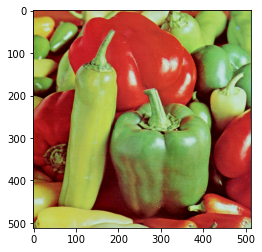

After compression:


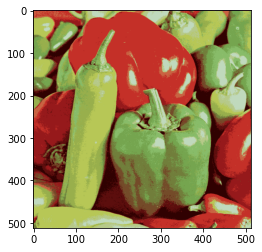

In [3]:
from matplotlib.image import imread
from matplotlib.image import imsave
import matplotlib.pyplot as plt
import numpy as np

print("Before compression:")
A = imread('data/peppers-large.tiff')
plt.imshow(A)
plt.show()
o, p = A[:,:,0].shape

## Data preprocessing 
X = []
for i in range(len(A[:,:,0])): 
    for j in range(len(A[:,:,0])): 
        X.append([A[:,:,0][i][j], A[:,:,1][i][j], A[:,:,2][i][j]])
X = np.array(X)
m, n = X.shape

## K-means clustering
np.random.seed(42)
mu = np.random.randint(0,255, size = (16,3)) # randomized cluster centroids

for k in range(35): 
    c = []
    for i in range(m):
        min_distance = []
        for j in range(16): 
            distance = np.mean((X[i,:] - mu[j,:])**2)
            min_distance.append(distance)
        c.append(np.argmin(min_distance))
    c = np.array(c)
    new_mu = np.copy(mu)     # Update value of mu 
    for i in range(16):
        indicator = np.where(c == i, 1, 0).reshape(m,1)
        if np.sum(indicator) != 0: 
            new_mu[i,:] = np.sum(indicator * X, axis = 0) / np.sum(indicator)
    mu = np.copy(new_mu)

Y = np.copy(A)
c = c.reshape(o,p)
for i in range(o): 
    for j in range(p):
        for k in range(16): 
            if c[i][j] == k: 
                Y[:,:,0][i][j] = mu[k,0]
                Y[:,:,1][i][j] = mu[k,1]
                Y[:,:,2][i][j] = mu[k,2]
                
imsave('output/peppers-large-output.tiff', Y) # Formation of compressed image
print("After compression:")
Y = imread('output/peppers-large-output.tiff')
plt.imshow(Y)
plt.show()

(b) Before compression, we need to represent the image in 24-bit color. By choosing only 16 colors, we require only 4-bit ($2^4$ places) to store all the possible values. So, this image is compressed by a factor of 6. 